In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
# Numpy

In [8]:
# a = np.array([1,5,8])
# a = np.array([0, 2, 1])
# b = np.array([6, 4, 2])
ar = np.arange(1, 10, 2) # массив из range

print(ar)

[1 3 5 7 9]


In [23]:
# print(a)
# a = np.array([0, 2, 1])
b = np.array([6, 4, 2])
# print(a - b)
# print(b.sum())
# print(b.max())

print(np.sort(b))

[2 4 6]


In [ ]:
# Pandas

In [28]:
dataList = [
    { 'date': '2020-07-01', 'value': 100 },
    { 'date': '2020-07-02', 'value': 200 },
    { 'date': '2020-07-03', 'value': 300 },
    { 'date': '2020-07-04', 'value': 400 },
    { 'date': '2020-07-05', 'value': 500 },
    { 'date': '2020-07-05', 'value': 600 },
    { 'date': '2020-07-05', 'value': 700 },
    { 'date': '2020-07-05', 'value': 800 },
]

In [36]:
# d = pd.DataFrame(dataList)
df = pd.DataFrame(dataList)
# print(df)

df.head()
# df.head(3)
# df.tail()

,date,value
0,2020-07-01,100
1,2020-07-02,200
2,2020-07-03,300
3,2020-07-04,400
4,2020-07-05,500


In [38]:
print(df['value'][4])

# print(df['date'][6])

# df['value'][3]

500


In [26]:
# Matplotlib

In [48]:
dataList = [
    { 'date': 15, 'value': 100 },
    { 'date': 15, 'value': 200 },
    { 'date': 1, 'value': 100 },
    { 'date': 150, 'value': 400 },
    { 'date': 28, 'value': 500 },
    { 'date': 28, 'value': 10 },
    { 'date': 28, 'value': 7 },
    { 'date': 28, 'value': 500 },
]
df = pd.DataFrame(dataList)
df.head()

,date,value
0,15,100
1,15,200
2,1,100
3,150,400
4,28,500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F93743BA30>]],
      dtype=object)

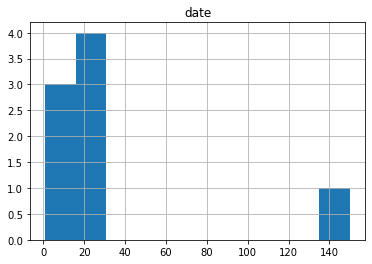

In [46]:
df.hist(column = ['date'])
# df.hist(column = ['value'])
# df.hist()
# df.hist(column = ['value'])

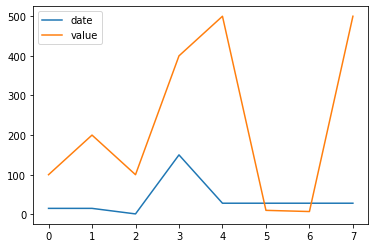

In [49]:
# df.plot()
df.plot()
plt.show()

In [60]:
# rawDfCPU = pd.read_csv('sar_cpu.csv',sep=';', delimiter=None,header=None,skiprows=[0])
# rawDfCPU = pd.read_csv('sar_cpu.csv',sep=';')
rawDfCPU = pd.read_csv('sar_cpu.csv',sep=';')
rawDfCPU.head()

,09:20:06,CPU,%usr,%nice,%sys,%iowait,%steal,%irq,%soft,%guest,%idle
0,09:21:06,all,4.98,0.00,5.10,0.00,0.00,0.00,0.06,0.00,89.86
1,09:21:06,0,12.88,0.00,5.62,0.03,0.00,0.02,1.27,0.00,80.18
2,09:21:06,1,1.47,0.00,85.91,0.00,0.00,0.00,0.00,0.00,12.63
3,09:21:06,2,2.15,0.00,5.54,0.00,0.00,0.00,0.00,0.00,92.31
4,09:21:06,3,0.20,0.00,8.88,0.00,0.00,0.00,0.08,0.00,90.84


In [63]:
# Получить все значения из 10-го столбца, заменить заголовок на "не значение" (NaN), перевести в float
# yVal = rawDfCPU.iloc[:, 10].replace('%idle',np.nan).astype(float)






yVal = rawDfCPU.iloc[:,10].replace('%idle',np.nan).astype(float)




print(yVal)

0       89.86
1       80.18
2       12.63
3       92.31
4       90.84
        ...  
4872    98.15
4873    97.53
4874    97.23
4875    99.83
4876    99.25
Name: %idle, Length: 4877, dtype: float64


In [77]:
dfCPU = pd.DataFrame({'Time':rawDfCPU.iloc[:, 0], "y":100-yVal, "CPU":rawDfCPU.iloc[:, 1]})
dfCPU.head()

,Time,y,CPU
0,09:21:06,10.14,all
1,09:21:06,19.82,0
2,09:21:06,87.37,1
3,09:21:06,7.69,2
4,09:21:06,9.16,3


In [81]:
dfCPU = dfCPU[dfCPU['CPU']=="all"]
dfCPU.reset_index(inplace = True, drop=True)
dfCPU.head()

,Time,y,CPU
0,09:21:06,10.14,all
1,09:22:06,10.40,all
2,09:23:06,10.37,all
3,09:24:06,10.16,all
4,09:25:06,10.62,all


(0.0, 50.0)

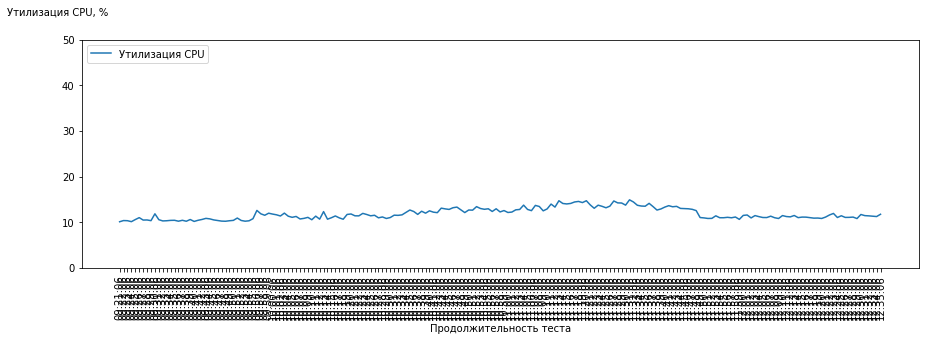

In [89]:
# yVal = rawDfCPU.iloc[:, 10].replace('%idle',np.nan).astype(float)
# dfCPU = pd.DataFrame({'Time':rawDfCPU.iloc[:, 0], "y":100-yVal, "CPU":rawDfCPU.iloc[:, 1]})
# dfCPU = dfCPU[dfCPU['CPU']=="all"]


fig, ax1 = plt.subplots(figsize=(15, 4.2))

ax1.plot(dfCPU.Time,dfCPU.y, label='Утилизация CPU')
ax1.legend(loc='upper left')

ax1.set_xlabel('Продолжительность теста')
ax1.set_ylabel('Утилизация CPU, %', rotation=0, y=1.1)

ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylim(0, 50)

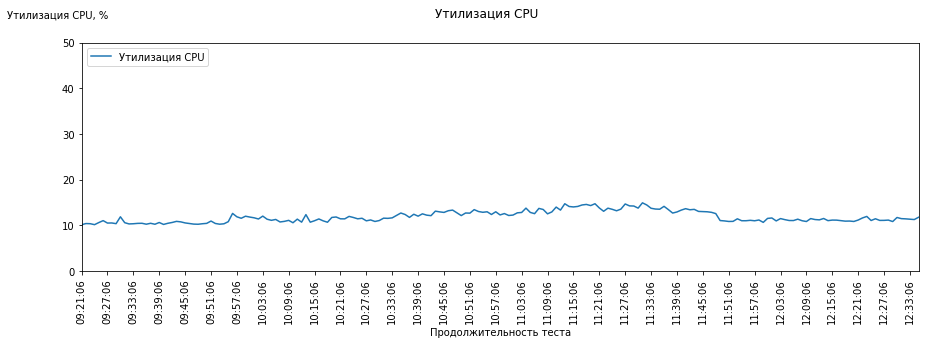

In [94]:
yVal = rawDfCPU.iloc[:, 10].replace('%idle',np.nan).astype(float)
dfCPU = pd.DataFrame({'Time':rawDfCPU.iloc[:, 0], "y":100-yVal, "CPU":rawDfCPU.iloc[:, 1]})
dfCPU = dfCPU[dfCPU['CPU']=="all"]
dfCPU.reset_index(inplace = True, drop=True)
fig, ax1 = plt.subplots(figsize=(15, 4.2))
ax1.plot(dfCPU.Time,dfCPU.y, label='Утилизация CPU')
ax1.legend(loc='upper left')
ax1.set_xlabel('Продолжительность теста')
ax1.set_ylabel('Утилизация CPU, %', rotation=0, y=1.1)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylim(0, 50)




# График Очереди


# dfQ = pd.read_csv('sar_queue.csv',sep=';', delimiter=None)
# ax2 = ax1.twinx()
# ax2.set_ylim(0,10)
# ax2.plot(dfQ['09:20:06'],dfQ['runq-sz'], color='limegreen', label='Длина очереди CPU')
# ax2.legend(loc='upper right')
# ax2.xaxis.label.set_visible(False)
# ax2.set_ylabel('Длина очереди, шт', rotation=0, y=1.1)




# Массив: от 0 до номера последнего эл-та списка CPU с шагом 6, для отрисовывания оси X
xAxis = np.arange(0, dfCPU.index[-1],6)
plt.xlim(dfCPU['Time'][0], dfCPU['Time'][dfCPU.index[-1]])
plt.xticks(xAxis, dfCPU['Time'][xAxis], rotation='vertical')
# fig.tight_layout()
fig.suptitle("Утилизация CPU", y=1.0)
plt.show()
plt.close()